In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df['total_spend'] = df['TV'] + df['radio'] + df ['newspaper']

In [5]:
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


<AxesSubplot:xlabel='total_spend', ylabel='sales'>

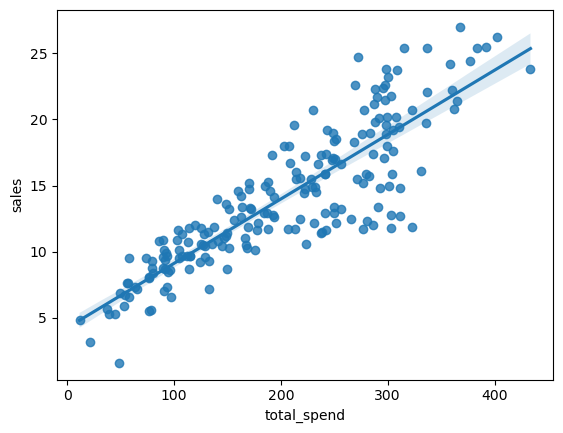

In [6]:
sns.regplot(data=df, x='total_spend',y='sales')

In [7]:
X = df['total_spend']
y = df['sales']

In [8]:
# y = mx+b
# help(np.polyfit)

In [9]:
np.polyfit(X,y,deg=1)

array([0.04868788, 4.24302822])

In [10]:
potential_spend = np.linspace(0,500,100)

In [11]:
predicted_sales = 0.04868788*potential_spend + 4.24302822

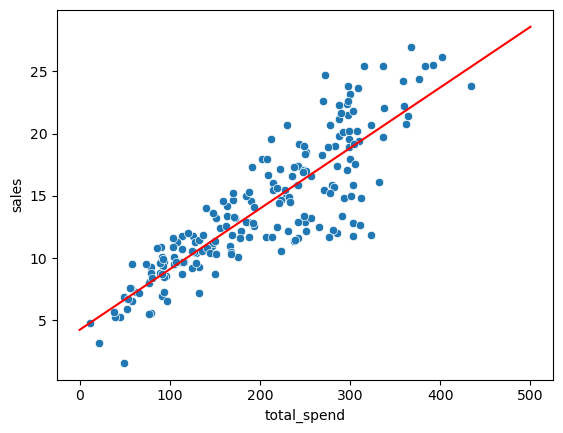

In [12]:
sns.scatterplot(x='total_spend', y='sales', data=df)
plt.plot(potential_spend,predicted_sales, color='red')

In [13]:
spend = 200

predicted_sales = 0.04868788*spend + 4.24302822

In [14]:
predicted_sales

13.98060422

In [15]:
np.polyfit(X,y,3)

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [16]:
pot_spend = np.linspace(0,500,100)

In [17]:
pred_spales = 3.07615033e-07*pot_spend**3 + -1.89392449e-04*pot_spend**2 + 8.20886302e-02*pot_spend + 2.70495053e+00

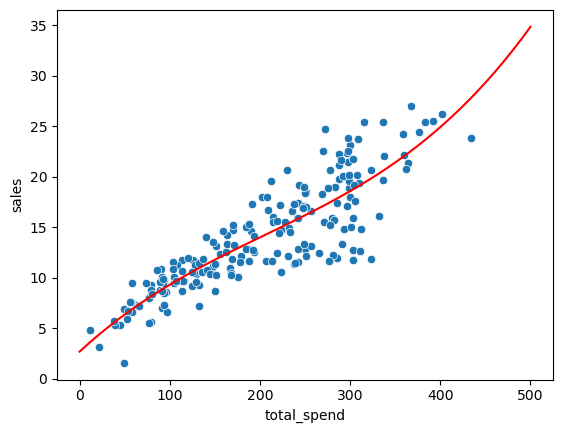

In [18]:
sns.scatterplot(x='total_spend', y='sales', data=df)
plt.plot(pot_spend,pred_spales, color='red')

In [19]:
df = pd.read_csv("Advertising.csv")

In [20]:
 # Features

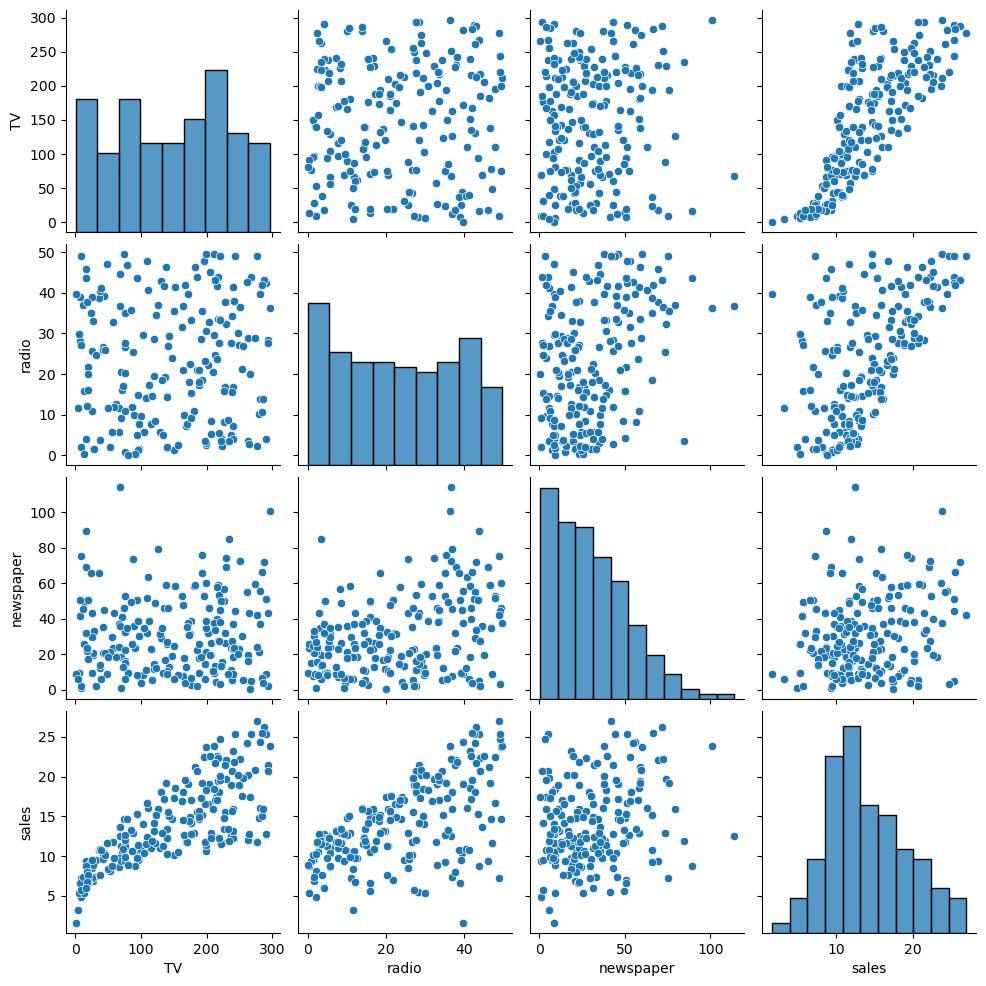

In [21]:
sns.pairplot(df)

In [22]:
X = df.drop('sales', axis=1)

In [23]:
y = df['sales']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [26]:
len(df)

200

In [27]:
len(X_test)

60

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
# help(LinearRegression)

In [30]:
model = LinearRegression()

In [31]:
model.fit(X_train, y_train)

LinearRegression()

In [32]:
test_predictions = model.predict(X_test)

In [33]:
# X_test.head()

In [34]:
# y_test

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [36]:
df['sales'].mean()

14.022500000000003

<AxesSubplot:xlabel='sales', ylabel='Count'>

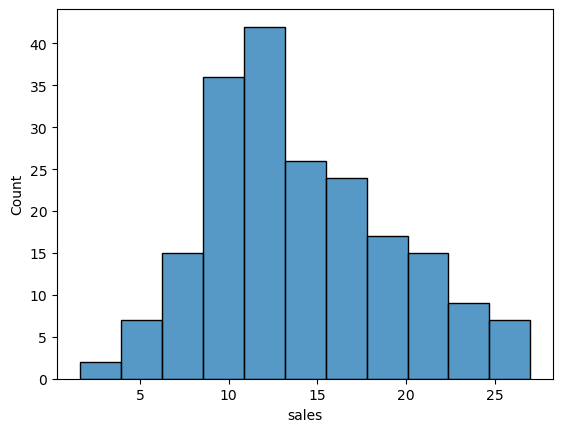

In [37]:
sns.histplot(data=df, x='sales')

In [38]:
mean_absolute_error(y_test, test_predictions)

1.2137457736144808

In [39]:
mean_squared_error(y_test,test_predictions)

2.2987166978863782

In [40]:
np.sqrt(mean_squared_error(y_test,test_predictions))

1.516151937599388

In [41]:
test_residuals = y_test - test_predictions


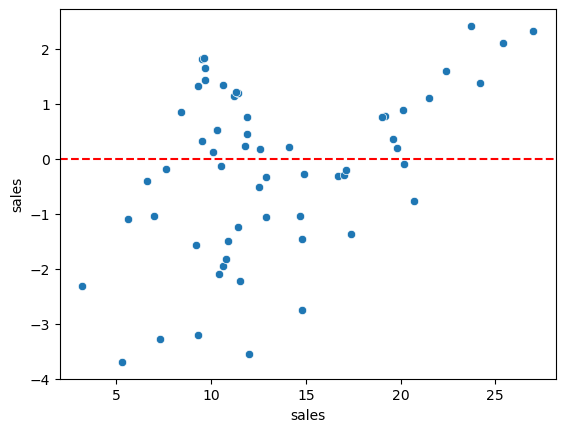

In [42]:
sns.scatterplot(x=y_test, y = test_residuals)
plt.axhline(y=0, color='r', ls='--')

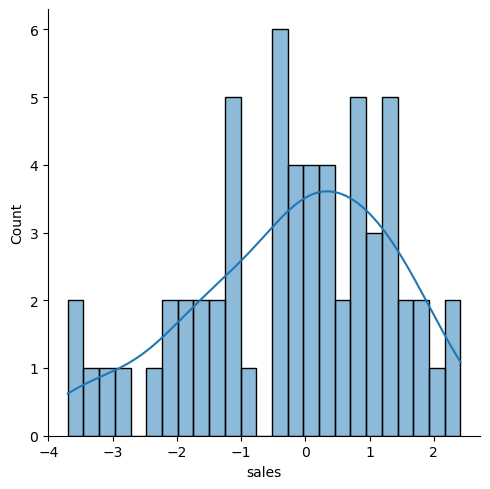

In [43]:
sns.displot(test_residuals, bins=25,kde=True)

In [44]:
import scipy as sp

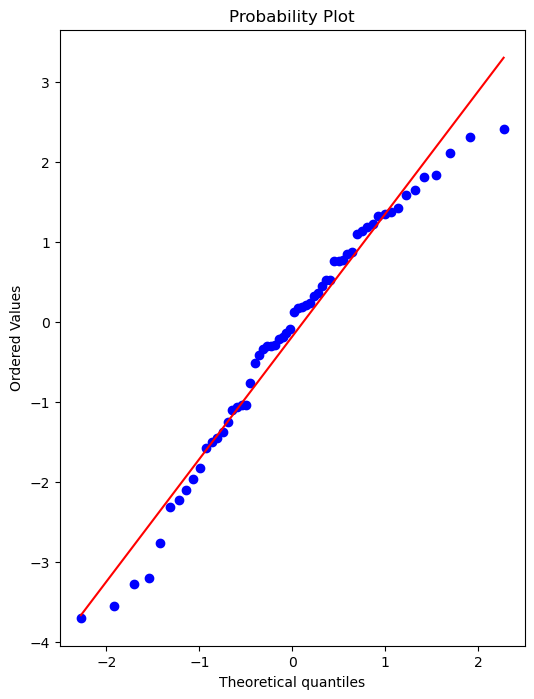

In [45]:
fix, ax = plt.subplots(figsize=(6,8),dpi=100)
_ = sp.stats.probplot(test_residuals, plot=ax)